In [7]:
from os import access
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.python.keras.activations import softmax
from tensorflow.python.keras import activations
from tensorflow.python.keras.metrics import accuracy
data = tf.keras.datasets.mnist

Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2633 - accuracy: 0.9220
Epoch 2/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1110 - accuracy: 0.9649
Epoch 3/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0753 - accuracy: 0.9759
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9727
Test Loss:  0.09002916514873505
Test Accuracy:  0.9726999998092651
1/1 [==============================] - 0s 63ms/step
The output of the prediction is :  5


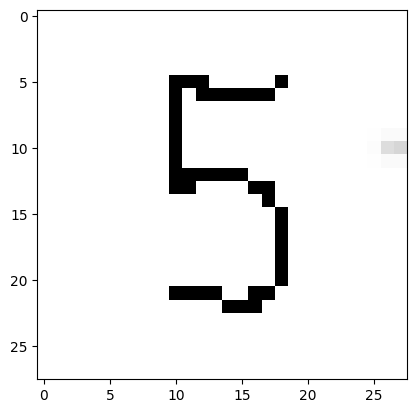

1/1 [==============================] - 0s 25ms/step
The output of the prediction is :  2


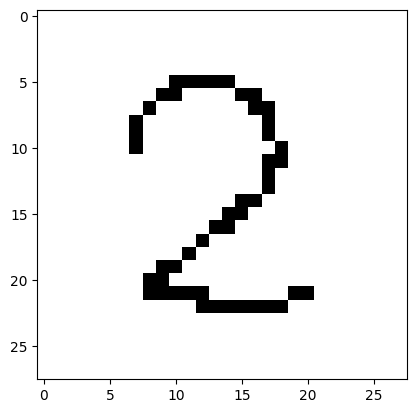

1/1 [==============================] - 0s 25ms/step
The output of the prediction is :  6


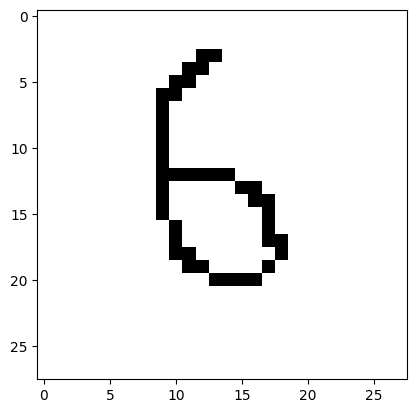

1/1 [==============================] - 0s 25ms/step
The output of the prediction is :  9


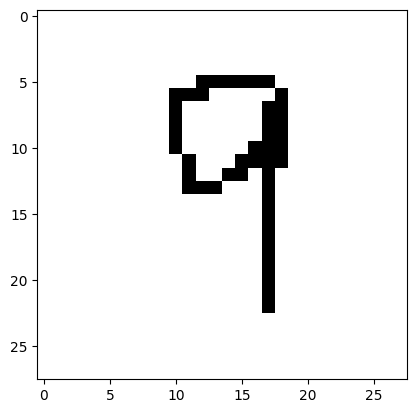

In [8]:
(a_train, b_train), (a_test, b_test)= data.load_data()

a_train = tf.keras.utils.normalize(a_train, axis=1)

a_test = tf.keras.utils.normalize(a_test, axis=1)

hdrModel = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

hdrModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hdrModel.fit(a_train, b_train, epochs = 4)

loss, accuracy = hdrModel.evaluate(a_test, b_test)

print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

for i in range(1, 5):
    imgg = cv.imread(f'{i}.png')[:,:,0]
    imgg = np.invert(np.array([imgg]))
    perdiction = hdrModel.predict(imgg)
    print("==================================")
    print("The output of the prediction is : ", np.argmax(perdiction))
    print("==================================")
    plt.imshow(imgg[0], cmap = plt.cm.binary)
    plt.show()
    
    